In [ ]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib. pyplot as plt

import plotly.express as px

from statsmodels. stats. outliers_influence import variance_inflation_factor

from sklearn. cluster import DBSCAN

from sklearn. tree import DecisionTreeRegressor

from sklearn. model_selection import train_test_split

In [2]:
df=pd.read_csv('../data/raw/energy_data_set.csv')

In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [6]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [7]:
df['date'] = pd. to_datetime(df['date']) 
df['month'] = df['date']. dt. month
df['weekday'] = df['date']. dt. weekday 
df['hour'] = df['date']. dt. hour
df['week'] = df['date']. dt. isocalendar(). week 
df['day_of_week'] =df['date']. dt. day_name() 
df['week_of_month'] = (df['date']. dt. day-1) // 7 + 1


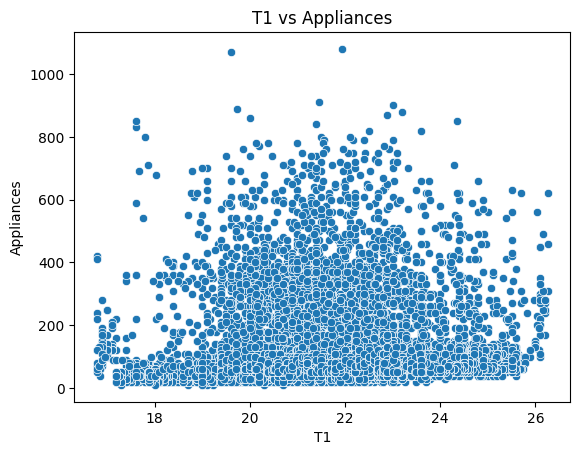

In [8]:
sns. scatterplot(x='T1', y='Appliances', data=df) 
plt. title("T1 vs Appliances") 
plt. show()

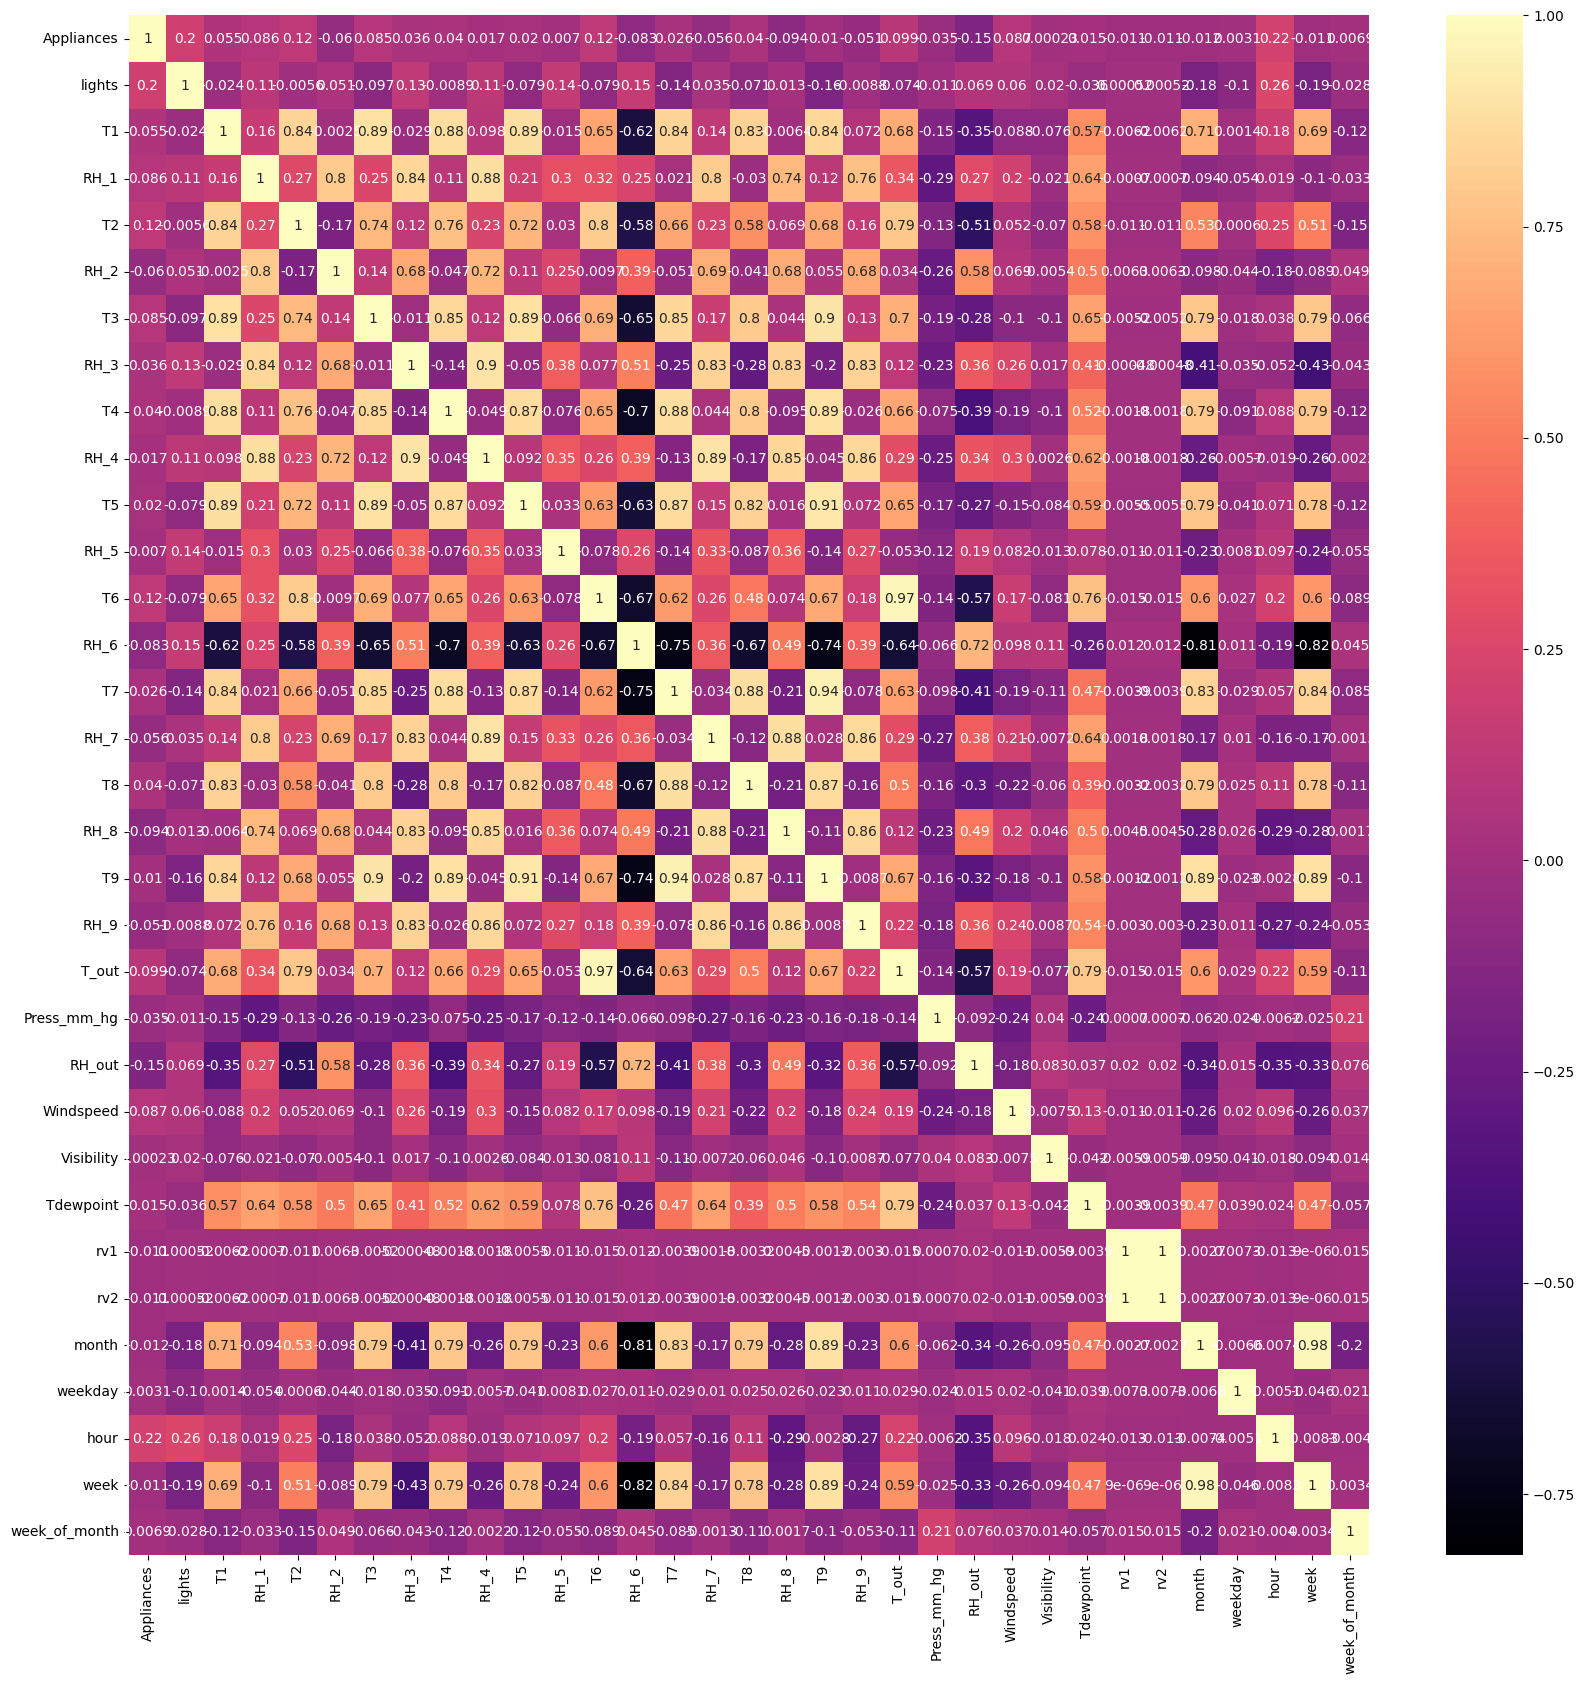

In [13]:
df_numeric = df.select_dtypes(include=[np.number])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='magma', annot=True)
plt.show()


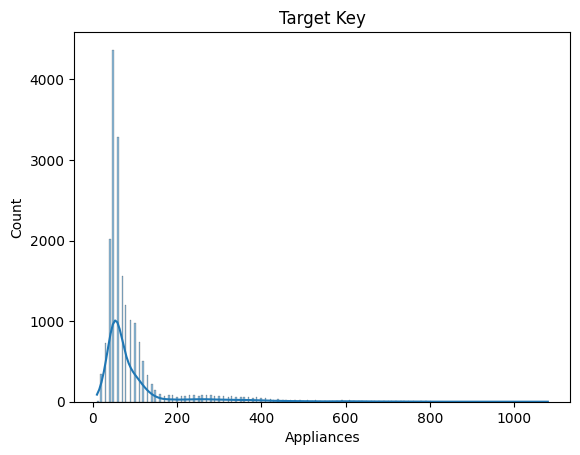

In [14]:
sns. histplot(df['Appliances'], kde=True) 
plt. title("Target Key") 
plt. show()

In [15]:
features = ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 
            'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 
            'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 
            'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']
X_vif = df[features]

vif = pd.DataFrame()
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print("VIF Results:\n", vif)

VIF Results:
        Features          VIF
0    Appliances     2.284702
1        lights     1.614563
2            T1  3606.384646
3          RH_1  1688.811559
4            T2  2519.584504
5          RH_2  2205.364940
6            T3  1276.028377
7          RH_3  1572.250962
8            T4  1027.802978
9          RH_4  1394.032518
10           T5  1187.467773
11         RH_5    45.212497
12           T6    89.644991
13         RH_6    40.427397
14           T7  1614.414817
15         RH_7   519.766076
16           T8   988.658164
17         RH_8   587.710860
18           T9  2605.026073
19         RH_9   640.567425
20        T_out   400.746379
21  Press_mm_hg  2088.596143
22       RH_out  1299.243530
23    Windspeed     5.272703
24   Visibility    12.037321
25    Tdewpoint   132.553551


In [16]:
def remove_outliers_DBSCAN(df_input, eps, min_samples):
    outlier_detection = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = outlier_detection.fit_predict(df_input.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    return data['cluster']


df_cluster_input = df[['Appliances']]
clusters = remove_outliers_DBSCAN(df_cluster_input, 0.5,10)
df['cluster'] = clusters.values

In [ ]:
import plotly.io as pio
pio.renderers.default = "browser"

data = pd.get_dummies(df, columns=['weekday'])
data['outlier_flag'] = (data['cluster'] == -1).astype(int)

fig = px.scatter(data, x="T1", y="Appliances", color="outlier_flag", 
                 marginal_y="violin", marginal_x="box", 
                 trendline="ols", template="simple_white",
                 title="Outlier Detection")
fig.show()

In [20]:
def remove_outlier_IQR(df_in):
    Q1 = df_in.quantile(0.25)
    Q3 = df_in.quantile(0.75)
    IQR = Q3 - Q1
    df_final = df_in[~((df_in < (Q1 - 1.5 * IQR)) | (df_in > (Q3 + 1.5 * IQR)))]
    return df_final

df_clean_appliances = remove_outlier_IQR(df['Appliances'])
print(f"Original Rows: {len(df)}, After IQR Clean: {len(df_clean_appliances)}")

Original Rows: 19735, After IQR Clean: 17597


In [21]:
X_fs = data.drop(columns=['Appliances', 'cluster', 'outlier_flag', 'date', 'day_of_week'], errors='ignore')
y_fs = data['Appliances']

X_train_fs, X_temp_fs, y_train_fs, y_temp_fs = train_test_split(X_fs, y_fs, test_size=0.4, random_state=23)

model_tree = DecisionTreeRegressor()
model_tree.fit(X_train_fs, y_train_fs)

importance = model_tree.feature_importances_
impList = zip(X_train_fs.columns, importance)
print("\nFeature Importance:") 
for feature in sorted(impList, key=lambda t: t[1], reverse=True): 
    print(feature)


Feature Importance:
('hour', np.float64(0.14348168538474165))
('T3', np.float64(0.062327005229110596))
('T8', np.float64(0.053344946747787426))
('RH_2', np.float64(0.05001988172564791))
('RH_5', np.float64(0.04702404406748822))
('RH_6', np.float64(0.04540730483056128))
('RH_3', np.float64(0.0407338215849021))
('Press_mm_hg', np.float64(0.03788412002217874))
('RH_1', np.float64(0.03648947412801991))
('T4', np.float64(0.036046878419240744))
('RH_9', np.float64(0.03564958048950152))
('RH_7', np.float64(0.03372849857236947))
('RH_8', np.float64(0.03299766991077468))
('T7', np.float64(0.028318262264290482))
('T1', np.float64(0.027643823646927277))
('lights', np.float64(0.0262484889416869))
('RH_out', np.float64(0.0262348858773783))
('Tdewpoint', np.float64(0.02496349795844902))
('rv2', np.float64(0.02135290639022484))
('Visibility', np.float64(0.02036284582655612))
('T2', np.float64(0.020203613509536738))
('RH_4', np.float64(0.01888351838811179))
('T6', np.float64(0.018696449675032784))
('